# Unemployment_Anlysis

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('Unemployment in India.csv')

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [37]:
# Assuming you have a DataFrame named 'data' with 7 columns
new_column_names = ["States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Region"]

# Assign the new column names
data.columns = new_column_names

In [7]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
#Check if this dataset contains missing values or not:
print(data.isnull().sum())

States                                 28
Date                                   28
Frequency                              28
Estimated Unemployment Rate            28
Estimated Employed                     28
Estimated Labour Participation Rate    28
Region                                 28
dtype: int64


C:\Users\baps\AppData\Local\Temp\ipykernel_10012\1570302106.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\baps\AppData\Local\Temp\ipykernel_10012\1570302106.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



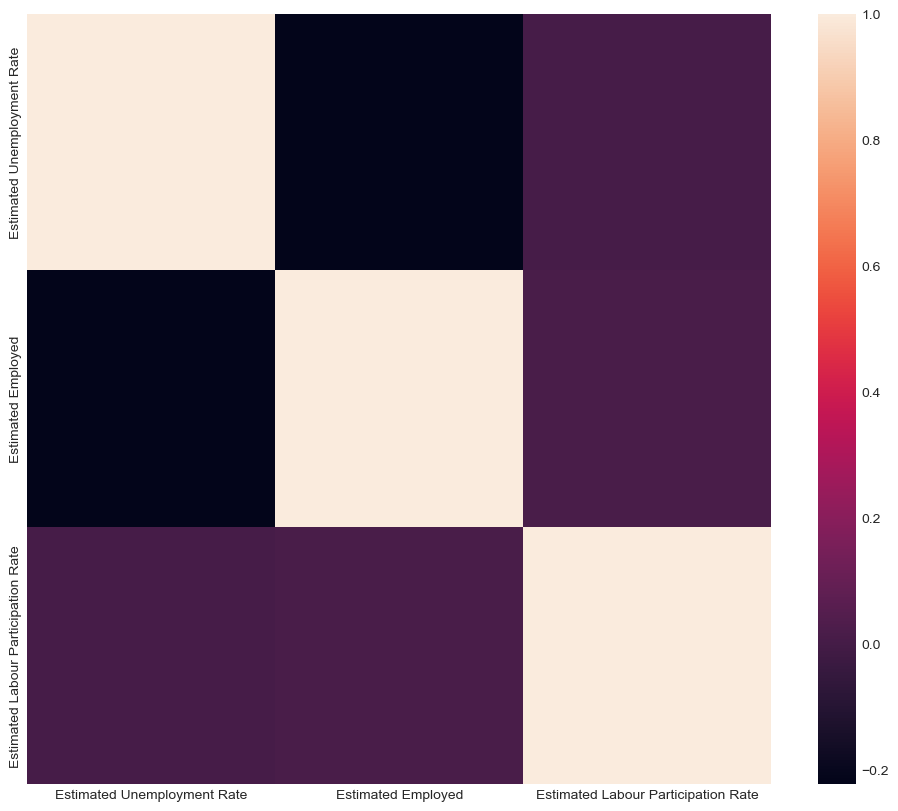

In [40]:
#correlation between the features of this dataset:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

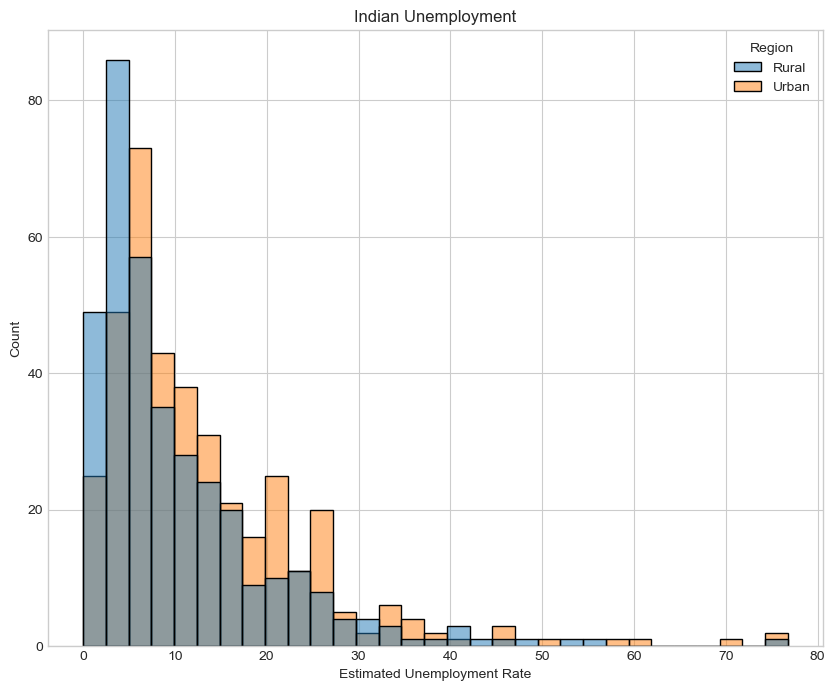

In [42]:
# Visualize unemployment rate according to different regions
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [43]:
# Create a dashboard to analyze the unemployment rate of each Indian state by region
unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [45]:
# Prepare the data for linear regression
X = data[['Estimated Unemployment Rate', 'Estimated Labour Participation Rate']]
y = data['Estimated Employed']

In [46]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [47]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
# Evaluate the model
coeff_data = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_data)

                                       Coefficient
Estimated Unemployment Rate         -141192.303013
Estimated Labour Participation Rate   -3981.883944


In [49]:
# Make predictions
predictions = lm.predict(X_test)

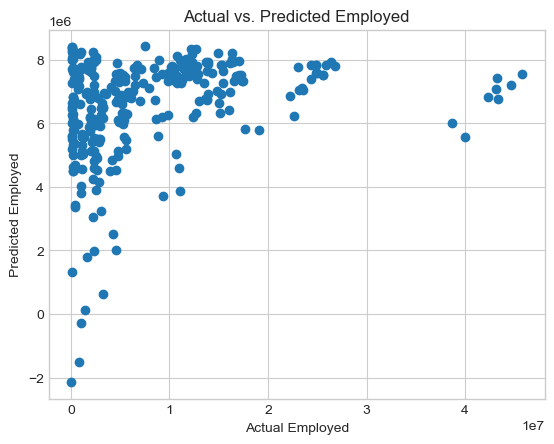

In [50]:
# Plot predictions against the target variable
plt.scatter(y_test, predictions)
plt.xlabel("Actual Employed")
plt.ylabel("Predicted Employed")
plt.title("Actual vs. Predicted Employed")
plt.show()

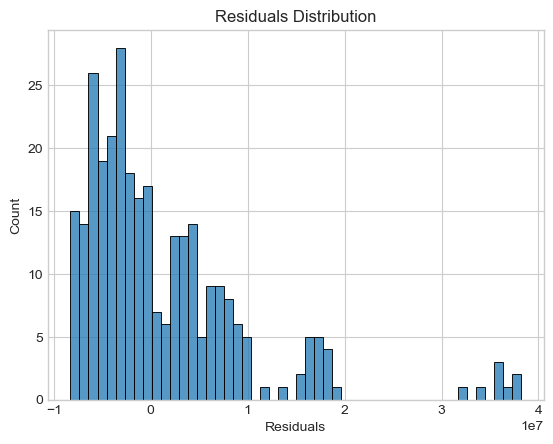

In [51]:
# Plot the residuals
sns.histplot((y_test - predictions), bins=50)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# THANK YOU!

## GitHub: https://github.com/anujtiwari21?tab=repositories 